# PCA (Principal Component Analysis)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib notebook

In [2]:
churn_df = pd.read_csv("datasets/ChurnData.csv")

In [3]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
columns = churn_df.columns[:-1]
columns.size

27

In [5]:
X = np.asarray(churn_df.loc[:, columns], dtype=np.float32)
y = np.asarray(churn_df['churn'])

In [6]:
# train / test dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
print(X_train.shape)
print(X_test.shape)

(160, 27)
(40, 27)


### PCA 적용 전 Logistic Regression

In [9]:
# Fitting Logistic Regression
clf = LogisticRegression(solver='lbfgs', random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# predict test set
y_pred = clf.predict(X_test)
# Confusion matrix
accuracy_score(y_test, y_pred)

0.775

### PCA 적용

- 27 개의 feature 를 2 개로 차원 축소

In [11]:
# Apply kernel PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)                # 2 개 component 로 차원 축소

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [12]:
print("차원 축소된 X_train :", X_train_pca.shape)
print(X_train_pca[:5])
print()
print("차원 축소된 X_test :", X_test_pca.shape)
print(X_test_pca[:5])

차원 축소된 X_train : (160, 2)
[[ 6.1252427  -2.9101825 ]
 [-1.7907636   2.6611078 ]
 [-0.6123653   2.6992145 ]
 [ 0.11432906 -1.7805345 ]
 [ 3.1427593   4.7126474 ]]

차원 축소된 X_test : (40, 2)
[[ 0.517728    1.3013049 ]
 [-0.2538366  -2.9665475 ]
 [-4.058648   -0.6377735 ]
 [-0.5239167   3.185847  ]
 [ 0.64675385  1.1866788 ]]


In [13]:
print(pca.components_.shape)
print("첫번째 주성분 :")
print(pca.components_[0])
print('설명된 분산의 비율', pca.explained_variance_ratio_)

(2, 27)
첫번째 주성분 :
[0.18870449 0.09407663 0.06999469 0.02405294 0.08039848 0.10532499
 0.09130017 0.22012776 0.24022882 0.1703587  0.2678314  0.16389638
 0.25017655 0.28326163 0.1763821  0.2743571  0.22993164 0.24062625
 0.26112375 0.07475983 0.22729254 0.21587749 0.06959318 0.17457926
 0.17900118 0.07082605 0.29323992]
설명된 분산의 비율 [0.25193477 0.2176447 ]


In [14]:
# Fitting Logistic Regression
clf = LogisticRegression(solver='lbfgs', random_state=0)
clf.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# predict test set
y_pred = clf.predict(X_test_pca)

In [16]:
# Confusion matrix
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.725

In [17]:
sum(pca.explained_variance_ratio_)

0.46957947313785553

## 차원 축소된 churn data 시각화
- 27 개의 feature 가 2 개의 PCA 로 차원 축소 되었으므로 평면상의 시각화 가능

In [18]:
X_train_pca.shape

(160, 2)

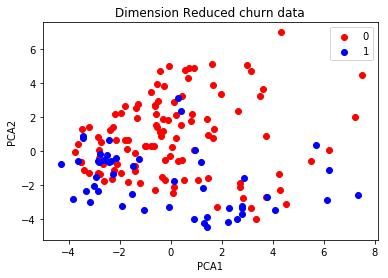

In [21]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['r', 'b'])

X1, X2 = X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1]
plt.scatter(X1, X2, color=cmap(0), label=0)

X1, X2 = X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1]
plt.scatter(X1, X2, color=cmap(1), label=1)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('Dimension Reduced churn data');

Text(0, 0.5, 'churn')

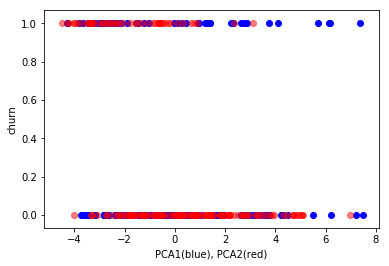

In [25]:
plt.scatter(X_train_pca[:, 0], y_train, c='b')
plt.scatter(X_train_pca[:, 1], y_train, alpha=0.5, c='r')
plt.xlabel("PCA1(blue), PCA2(red)")
plt.ylabel("churn")

### 3 차원 축소

In [26]:
pca = PCA(n_components=3)                # 2 개 component 로 차원 축소

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("차원 축소된 X_train :", X_train_pca.shape)
print(X_train_pca[:5])
print()
print("차원 축소된 X_test :", X_test_pca.shape)
print(X_test_pca[:5])
print()
print('설명된 분산의 비율', pca.explained_variance_ratio_)

차원 축소된 X_train : (160, 3)
[[ 6.1252427  -2.9101825  -0.31197983]
 [-1.7907636   2.6611078   1.2601514 ]
 [-0.6123653   2.6992145  -0.22648107]
 [ 0.11432906 -1.7805345  -2.2009366 ]
 [ 3.1427593   4.7126474  -0.55305433]]

차원 축소된 X_test : (40, 3)
[[ 0.517728    1.3013049   1.5810984 ]
 [-0.2538366  -2.9665475   0.6917321 ]
 [-4.058648   -0.6377735  -0.9527021 ]
 [-0.5239167   3.185847    1.3873055 ]
 [ 0.64675385  1.1866788  -2.1136382 ]]

설명된 분산의 비율 [0.25193477 0.2176447  0.11380335]


### 3 차원 시각화

<IPython.core.display.Javascript object>


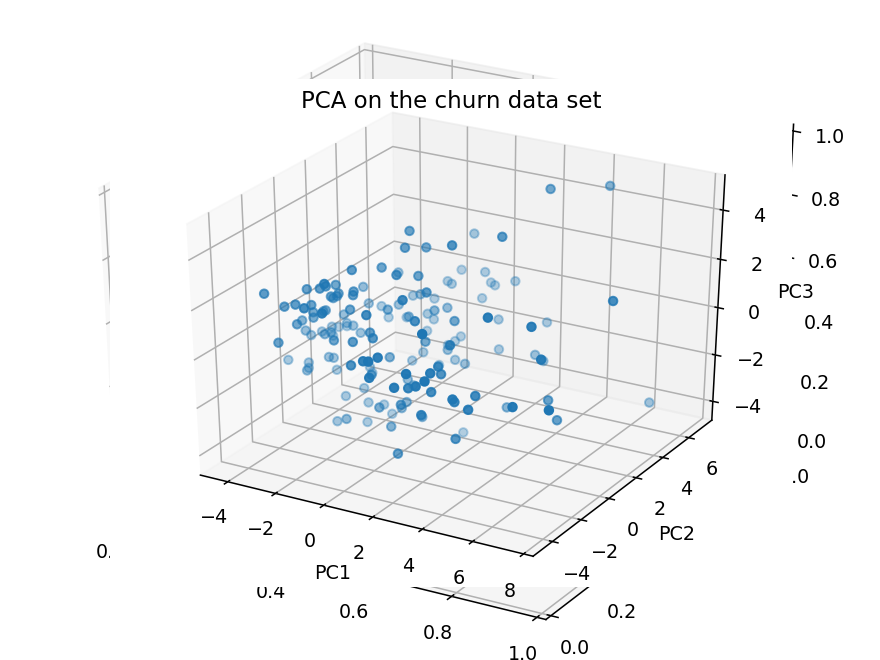

In [28]:
from mpl_toolkits.mplot3d import axes3d, Axes3D 
%matplotlib notebook
 
fig = plt.figure()
ax = Axes3D(fig) 

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2])

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the churn data set")
plt.show()

# 실습 - Cell sample data 를 이용한 PCA + SVC 

In [23]:
cell_df = pd.read_csv("datasets/cell_samples.csv")

In [24]:
feature_df = cell_df.drop(['ID', 'BareNuc'], axis=1)
feature_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,3,1,1,2
1,5,4,4,5,7,3,2,1,2
2,3,1,1,1,2,3,1,1,2
3,6,8,8,1,3,3,7,1,2
4,4,1,1,3,2,3,1,1,2


In [25]:
# Scaling, Train / Test split

### PCA 적용전 SVC 로 accuracy test

In [26]:
# Your code here

### PCA 적용후 SVC 로 accuracy test 하여 전과 비교

In [27]:
# Your code here